In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
activi_trace = pd.read_csv("FluorescenceTrace.csv")

In [6]:
activi_trace.head()

,-111.2381,-174.1326,-201.5252,-245.4865,-251.7601,17.8523,-9.831292,72.89537,-2.241124,77.79547,...,9.278708,-7.583295,44.00992,-7.759532,10.74348,61.27821,13.58856,51.62211,31.85942,98.25671
0,30.57407,45.520210,10.29079,55.204000,58.025810,24.237880,3.962854,12.43157,32.54930,16.542390,...,37.698540,18.84180,4.293175,2.023063,12.87713,43.15529,24.634640,51.07531,13.42161,95.56033
1,13.73693,14.772120,56.12538,15.336600,13.401330,-15.714510,1.929629,21.41208,85.40021,44.627150,...,-7.994761,-12.33921,30.435450,10.029080,11.04298,20.08897,11.747490,52.46560,38.44222,105.97700
2,28.53278,-5.418877,68.59309,0.834693,-1.005828,13.810490,-2.965520,25.17465,40.70879,-1.052256,...,-7.988630,53.91482,32.465560,-4.515440,13.74782,24.87298,30.034190,56.16319,49.75621,105.20240
3,-15.75013,26.820240,20.33050,29.208070,14.414210,-0.129515,-1.476215,25.88847,31.85671,2.196286,...,21.662670,19.61970,21.769230,6.530908,10.23949,32.22956,2.800672,51.75377,34.38996,99.72549
4,26.97933,39.784250,27.75546,46.946620,20.441440,48.031310,-8.415356,24.99530,45.48987,9.525716,...,32.439120,12.28585,26.510150,8.079632,14.33524,21.42175,32.857480,51.89917,45.09408,96.43964


In [7]:
activi_trace.describe()

,-111.2381,-174.1326,-201.5252,-245.4865,-251.7601,17.8523,-9.831292,72.89537,-2.241124,77.79547,...,9.278708,-7.583295,44.00992,-7.759532,10.74348,61.27821,13.58856,51.62211,31.85942,98.25671
count,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,...,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000,33999.000000
mean,13.619666,13.748285,18.660498,19.437225,16.681483,14.910588,11.628501,19.123088,19.195673,15.436117,...,26.549641,25.733649,13.144764,12.632743,13.548527,16.303077,9.953097,29.570103,20.106577,49.041309
std,15.623684,14.557910,24.486734,22.732026,19.865751,15.632667,11.588071,25.597164,20.713467,29.449626,...,30.876683,37.219412,15.305646,19.075419,10.339644,27.751491,12.427327,18.637838,21.206415,34.458004
min,-49.795980,-39.625560,-58.035160,-52.028720,-48.869000,-41.168550,-36.723910,-53.959170,-61.997800,-72.923520,...,-86.673700,-61.113030,-39.697330,-67.477130,-22.029320,-67.837600,-31.517110,-19.391670,-41.262180,-54.866760
25%,3.288722,3.784165,2.388502,4.986256,3.372363,4.533372,3.929727,4.397074,5.251345,-2.940719,...,5.962107,6.662382,2.837174,0.541844,6.275815,-1.678740,1.956380,12.094995,4.281527,31.594765
50%,12.753100,13.121130,17.293040,17.471080,15.331030,14.269230,11.227450,16.964180,17.941960,12.441750,...,22.452260,21.357510,12.239490,10.075160,13.231980,13.967930,8.981635,31.946330,17.377990,55.204730
75%,22.908030,22.872645,33.082590,31.143425,27.954445,24.461825,18.910000,30.393195,31.394890,29.960475,...,42.001075,37.561915,22.261005,21.281570,20.543860,30.789335,16.457680,45.806900,33.719705,72.034080
max,155.801400,161.279300,287.471500,332.885700,251.276200,192.250600,134.870700,665.740500,222.721500,438.664000,...,273.309700,820.870700,179.737600,280.573300,62.190510,646.818500,146.965100,90.558430,231.240600,145.266200


In [8]:
# center & scale
v = np.zeros(5)
print(v)

[0. 0. 0. 0. 0.]


In [30]:
scaled = StandardScaler().fit_transform(activi_trace.T)
pca = PCA(0.95)
pca.fit(scaled)
pca_data = pca.transform(scaled)

In [10]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# percentage variation each component accounts for
per_var = pca.explained_variance_ratio_*100


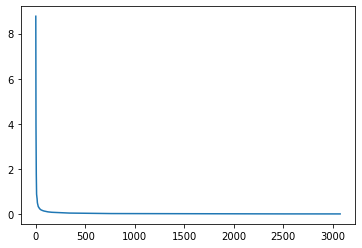

In [11]:
per_var.shape
plt.plot(per_var)

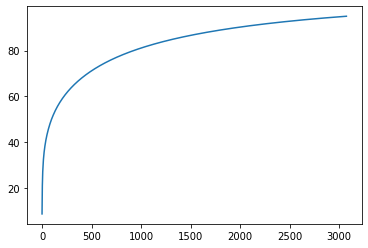

In [12]:
# cumulative percent of variance vs num of principal components
plt.plot(np.cumsum(per_var))

<BarContainer object of 3075 artists>

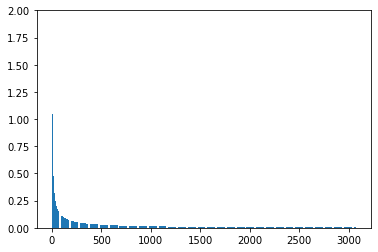

In [13]:
plt.ylim([0, 2])
plt.bar(x = range(1, len(per_var)+1),height = per_var)

In [14]:
# k means clustering
# https://benalexkeen.com/k-means-clustering-in-python/
# 1. initialize centroid
kmeans = KMeans(n_clusters = 35)



In [31]:
df = pd.DataFrame(data = pca_data)

In [16]:
df.shape

(6386, 3075)

In [17]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=35, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# learn the labels
label = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [19]:
print(label)

[24 12 24 ... 15 24 27]


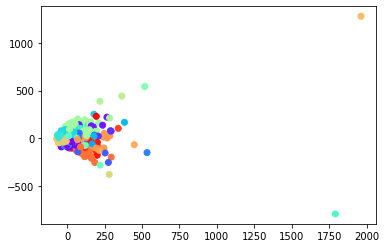

In [22]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = label, cmap = "rainbow")

In [11]:
# hierarchical clustering
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
from sklearn.preprocessing import normalize
data_scaled = normalize(activi_trace)
data_scaled = pd.DataFrame(data_scaled, columns = activi_trace.columns)
data_scaled.head()

,-111.2381,-174.1326,-201.5252,-245.4865,-251.7601,17.8523,-9.831292,72.89537,-2.241124,77.79547,...,9.278708,-7.583295,44.00992,-7.759532,10.74348,61.27821,13.58856,51.62211,31.85942,98.25671
0,0.008567,0.012755,0.002884,0.015469,0.016259,0.006792,0.001110,0.003483,0.009121,0.004635,...,0.010563,0.005280,0.001203,0.000567,0.003608,0.012092,0.006903,0.014312,0.003761,0.026777
1,0.003523,0.003788,0.014394,0.003933,0.003437,-0.004030,0.000495,0.005491,0.021902,0.011445,...,-0.002050,-0.003164,0.007805,0.002572,0.002832,0.005152,0.003013,0.013455,0.009859,0.027179
2,0.005710,-0.001084,0.013728,0.000167,-0.000201,0.002764,-0.000593,0.005038,0.008147,-0.000211,...,-0.001599,0.010790,0.006497,-0.000904,0.002751,0.004978,0.006011,0.011240,0.009958,0.021054
3,-0.002904,0.004946,0.003749,0.005386,0.002658,-0.000024,-0.000272,0.004774,0.005874,0.000405,...,0.003995,0.003618,0.004014,0.001204,0.001888,0.005943,0.000516,0.009543,0.006341,0.018389
4,0.005788,0.008535,0.005955,0.010072,0.004386,0.010305,-0.001805,0.005363,0.009760,0.002044,...,0.006960,0.002636,0.005688,0.001733,0.003076,0.004596,0.007049,0.011135,0.009675,0.020691


In [ ]:
# to decide number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))


In [32]:
# hierarchical clustering using PCA data 
# https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
from sklearn.preprocessing import normalize
scaled = normalize(df)
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074
0,-0.753315,-0.021486,0.288068,0.028277,0.260551,0.141855,0.070210,0.010634,0.013135,0.020371,...,0.009688,-0.001823,-0.007212,0.005414,0.014042,0.017580,-0.009027,0.001820,-0.018378,-0.000314
1,-0.798470,-0.041426,0.159388,0.048843,0.168869,0.156582,0.123509,-0.008034,0.046425,0.045314,...,0.006667,0.009916,-0.007725,-0.008700,-0.004727,0.008345,-0.003685,-0.020737,-0.014525,0.005977
2,-0.396311,0.000450,0.094319,0.021507,0.075421,0.073633,0.082606,0.006901,0.025410,0.037839,...,0.026865,0.011464,-0.015428,-0.039732,-0.006839,0.055081,-0.027930,0.008243,0.032997,0.020506
3,-0.429196,-0.289763,0.133946,0.045111,0.111751,0.099816,0.156245,0.009888,0.018781,0.032778,...,0.038592,0.036997,0.010816,0.021602,0.014407,0.009040,0.006786,0.013088,-0.012986,-0.014537
4,-0.608039,-0.125199,0.054409,0.184139,0.186385,0.199797,0.124923,-0.033255,0.046370,0.057813,...,-0.026957,0.009925,-0.011810,0.003577,-0.013976,0.007306,-0.010178,-0.007572,0.009653,-0.001419


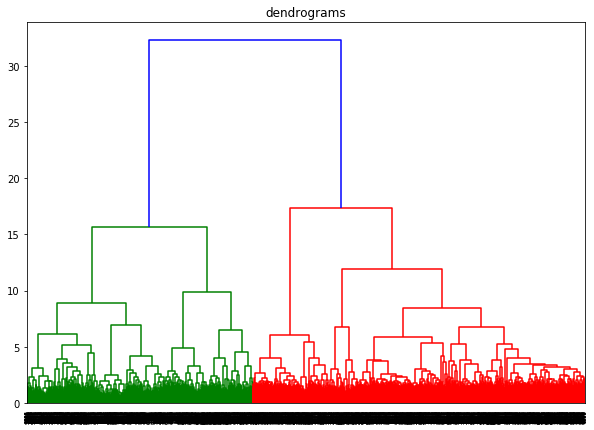

In [34]:
# to decide number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("dendrograms")
dend = shc.dendrogram(shc.linkage(scaled, method = 'ward'))

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 35, affinity = "euclidean", linkage = 'ward')
label = cluster.fit_predict(scaled)

array([ 9,  9, 25, ..., 32, 14, 24])

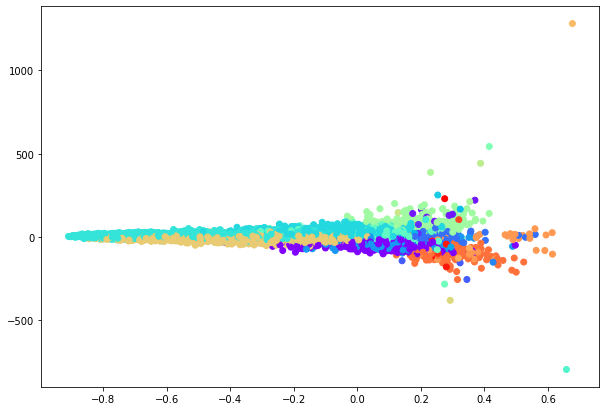

In [40]:
plt.figure(figsize = (10, 7))
plt.scatter( scaled.iloc[:, 0], df.iloc[:, 1] ,c = label, cmap = "rainbow")
